In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from imblearn.over_sampling import RandomOverSampler 
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay, classification_report

In [7]:
%matplotlib inline

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df = pd.read_csv('data.csv')

In [10]:
X = df.drop(['Bankrupt?'], axis = 1)
y = df['Bankrupt?']

# Recursive features elimination

In [34]:
from sklearn.feature_selection import RFE

knn = KNeighborsClassifier()
rfe = RFE(knn, n_features_to_select=12, verbose=False)
rfe.fit(X, y)

ValueError: when `importance_getter=='auto'`, the underlying estimator KNeighborsClassifier should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [16]:
# After we run the algorithm, it labels the top features as 1 and the rest are marked in an increasing order of importance.
df_RFE = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
#pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
df_RFE['Column_name'] = pd.DataFrame(X).columns
#df.head()
df_RFE[df_RFE['Rank']==1]

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Total Asset Growth Rate,Net Value Growth Rate,Current Ratio,Quick Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Revenue per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Inventory/Current Liability,Long-term Liability to Current Assets,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,Equity to Liability
0,0.370594,0.424389,0.405750,1.256969e-04,0.0,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.017560,0.095921,0.138736,4.980000e+09,0.000327,0.002259,0.001208,0.021266,0.207576,0.792424,0.006479,0.095885,0.137757,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.034164,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.001036,0.025592,0.064856,7.010000e+08,6.550000e+09,4.580000e+08,0.424206,0.118250,0.0,0.716845,0.009219,0.016469
1,0.464291,0.538214,0.516730,2.897851e-04,0.0,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.021144,0.093722,0.169918,6.110000e+09,0.000443,0.006016,0.004039,0.012502,0.171176,0.828824,0.005835,0.093743,0.168962,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.006889,0.012335,0.751111,0.127236,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.005210,0.023947,0.025516,1.065198e-04,7.700000e+09,2.490000e+09,0.468828,0.047775,0.0,0.795297,0.008323,0.020794
2,0.426071,0.499019,0.472295,2.361297e-04,25500000.0,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.005944,0.092338,0.142803,7.280000e+09,0.000396,0.011543,0.005348,0.021248,0.207516,0.792484,0.006562,0.092318,0.148036,0.014993,0.001495,0.004227,6.500000e+07,2.650000e+09,0.028997,0.141016,0.829502,0.340201,0.602806,0.000991,0.006302,5.340000e+09,0.098162,0.013879,0.003715,0.021387,1.791094e-03,1.022676e-03,7.610000e+08,0.276179,0.025346,0.0,0.774670,0.040003,0.016474
3,0.399844,0.451265,0.457733,1.078888e-04,0.0,0.000449,0.0,0.154187,0.154187,0.154187,0.193722,0.014368,0.077762,0.148603,4.880000e+09,0.000382,0.004194,0.002896,0.009572,0.151465,0.848535,0.005366,0.077727,0.147561,0.089955,0.001966,0.003215,7.130000e+09,9.150000e+09,0.015463,0.021320,0.725754,0.161575,0.225815,0.018851,0.002961,1.010646e-03,0.098715,0.003540,0.022165,0.024161,8.140000e+09,6.050000e+09,2.030000e+09,0.559144,0.067250,0.0,0.739555,0.003252,0.023982
4,0.465022,0.538432,0.522298,7.890000e+09,0.0,0.000686,0.0,0.167502,0.167502,0.167502,0.212537,0.029690,0.096898,0.168412,5.510000e+09,0.000439,0.006022,0.003727,0.005150,0.106509,0.893491,0.006624,0.096927,0.167461,0.175412,0.001449,0.004367,1.633674e-04,2.935211e-04,0.058111,0.023988,0.751822,0.260330,0.358380,0.014161,0.004275,6.804636e-04,0.110195,0.004869,0.000000,0.026385,6.680000e+09,5.050000e+09,8.240000e+08,0.309555,0.047725,0.0,0.795016,0.003878,0.035490


# Singular Value Decomposition on the variables selected by k-best

In [19]:
scaler = StandardScaler()
scaler.fit(selected)
scaler.transform(selected)
X_temp = pd.DataFrame(scaler.transform(selected), columns=selected.columns)

In [21]:
pca = PCA(random_state=5)
pca.fit(X_temp)

print(pca.explained_variance_ratio_)



[1.98671823e-01 8.37245297e-02 6.67533713e-02 3.71738891e-02
 3.21096096e-02 3.04199120e-02 2.95002828e-02 2.55230921e-02
 2.44678054e-02 2.35429587e-02 2.29418299e-02 2.23308507e-02
 2.17256355e-02 2.12634804e-02 2.08524835e-02 2.04704854e-02
 2.00211570e-02 1.98903891e-02 1.98381311e-02 1.94118390e-02
 1.85414373e-02 1.79701939e-02 1.78166502e-02 1.76765216e-02
 1.71458600e-02 1.65256665e-02 1.64013402e-02 1.52997976e-02
 1.40132455e-02 1.30140249e-02 1.18096566e-02 1.09913207e-02
 9.74287855e-03 9.35228872e-03 7.30432347e-03 5.98116342e-03
 5.14398542e-03 4.00833329e-03 3.68207237e-03 3.08363273e-03
 1.91811843e-03 7.82464501e-04 6.37103109e-04 3.66827970e-04
 1.14311300e-04 2.17302854e-05 1.85135717e-05 2.98203614e-06
 4.02240066e-20 2.26164022e-31]


In [ ]:
X_pca = pd.DataFrame(pca.transform(X_temp)).iloc[:,0:8]

In [25]:
plt.rcParams['figure.figsize'] = [15, 10]


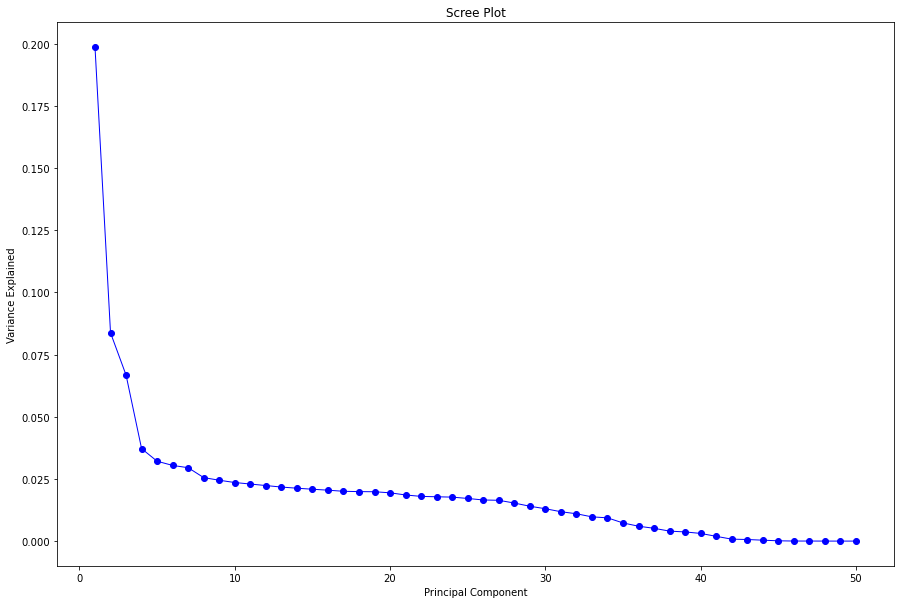

In [26]:
PC_values = np.arange(pca.n_components_) +1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=1, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [27]:
variance_acc_temp = pd.Series(pca.explained_variance_ratio_.cumsum()) 
print (variance_acc_temp)

0     0.198672
1     0.282396
2     0.349150
3     0.386324
4     0.418433
5     0.448853
6     0.478353
7     0.503877
8     0.528344
9     0.551887
10    0.574829
11    0.597160
12    0.618886
13    0.640149
14    0.661002
15    0.681472
16    0.701493
17    0.721384
18    0.741222
19    0.760634
20    0.779175
21    0.797145
22    0.814962
23    0.832638
24    0.849784
25    0.866310
26    0.882711
27    0.898011
28    0.912024
29    0.925038
30    0.936848
31    0.947839
32    0.957582
33    0.966934
34    0.974239
35    0.980220
36    0.985364
37    0.989372
38    0.993054
39    0.996138
40    0.998056
41    0.998839
42    0.999476
43    0.999842
44    0.999957
45    0.999979
46    0.999997
47    1.000000
48    1.000000
49    1.000000
dtype: float64


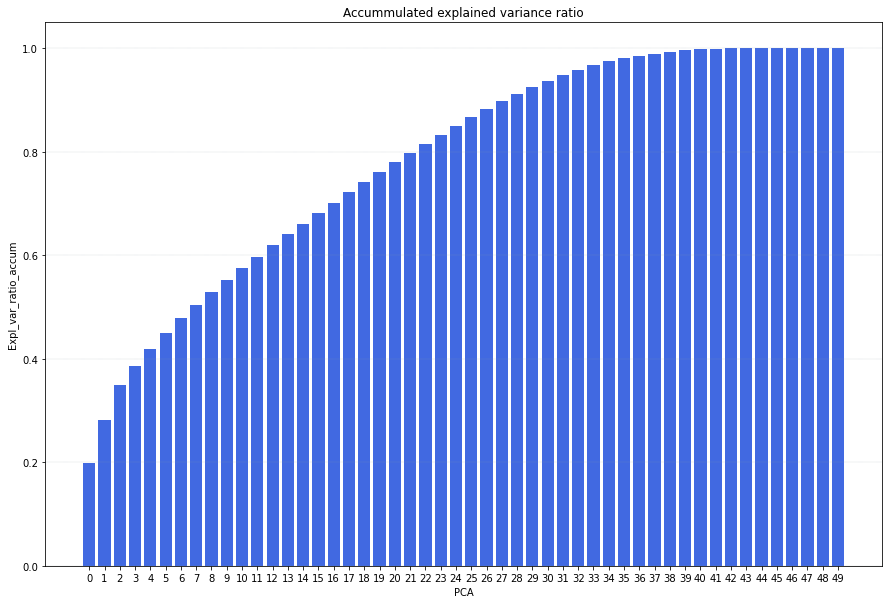

In [28]:
plt.bar(range(len(variance_acc_temp)), variance_acc_temp, color='royalblue' )
plt.grid(color='#95a5a6', linestyle='--', linewidth=0.2, axis='y' )
plt.xticks(range(len(variance_acc_temp)))
plt.xlabel('PCA')
plt.ylabel('Expl_var_ratio_accum')
plt.title('Accummulated explained variance ratio')


plt.show()

In [ ]:
coefficients= pd.DataFrame(pca.components_)

In [ ]:
coefficients